In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv("C:/Users/soumi/Downloads/med_data.csv")

In [3]:
# Data preprocessing
data.dropna(subset=['Height','Age','Weight','Gender','Blood Group','Blood Pressure'], inplace=True)
data = data[data['Age'].astype(str).str.isnumeric()]
data = data[data['Weight'] > 0]

# Display basic statistics
print("Basic Statistics:")
print(data.describe())
print("\n")

Basic Statistics:
           Height         Age      Weight
count  140.000000  140.000000  140.000000
mean   164.671429   25.050000   61.625000
std     10.024748   10.018203   13.584418
min    134.000000   13.000000   38.000000
25%    158.750000   20.000000   50.000000
50%    165.000000   21.000000   60.000000
75%    170.000000   23.000000   70.000000
max    210.000000   60.000000  120.000000




In [4]:
# Calculate BMI
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Apply the categorization function to the 'BMI' column
data['BMI Category'] = data['BMI'].apply(categorize_bmi)
data

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,BMI,BMI Category
0,26/08/2023 10:39:07,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,Male,O+,Normal,"Pollen Allergy, Dust Allergy, Animal Allergy, ...",...,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem",22.656250,Normal
1,26/08/2023 10:55:45,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,Male,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.491349,Normal
2,26/08/2023 10:57:58,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,Female,B+,Normal,None,...,NaN,NaN,NaN,NaN,None,Aldry lotion,Paracetamol and citrisin,Abdominal pain,17.301038,Underweight
3,26/08/2023 10:58:17,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,Female,B+,Normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,21.303949,Normal
4,26/08/2023 10:58:34,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,Male,O+,Normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.343516,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30/08/2023 23:38:14,NaN,Hemanta Sinha Roy,165,53,65.0,Male,A+,High,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,23.875115,Normal
136,31/08/2023 09:36:05,NaN,Tamanna Ajmi,157,18,59.0,Female,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem",23.936062,Normal
137,02/09/2023 17:38:14,NaN,ARNAB HAZRA,157,40,64.0,Male,A+,Normal,"Dust Allergy, None",...,No,No,No,No,No,Yes,No,Fever,25.964542,Overweight
138,06/09/2023 14:37:45,NaN,Ps,155,22,63.0,Male,O+,Normal,"Dust Allergy, Smoke Allergy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy",26.222685,Overweight


In [6]:
#Save the DataFrame as a CSV file
data.to_csv('C:/Users/soumi/Downloads/new_med.csv', index=False)

Average Weight: 61.62 kgs
Average BMI: 22.64


BMI Distribution by Category:
Normal         82
Overweight     34
Underweight    20
Obese           4
Name: BMI Category, dtype: int64


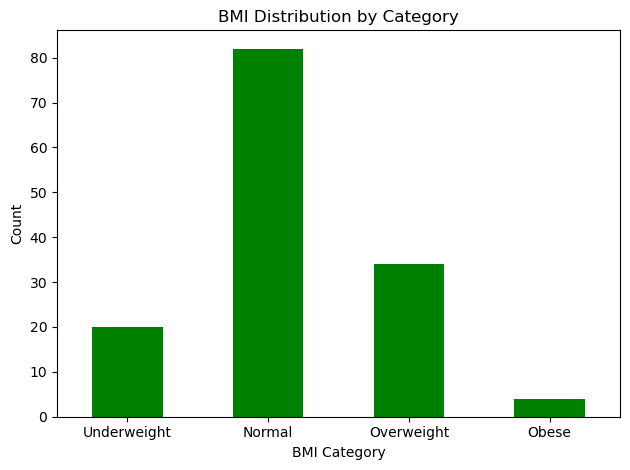

In [8]:
# Calculate average weight and BMI
average_weight = data['Weight'].mean()
average_bmi = data['BMI'].mean()

# Display average weight and BMI
print(f"Average Weight: {average_weight:.2f} kgs")
print(f"Average BMI: {average_bmi:.2f}") 
print("\n")

# Plot BMI Distribution by Category
bmi_category_counts = data['BMI Category'].value_counts()
print("BMI Distribution by Category:")
print(bmi_category_counts)
# Specify the order of categories for plotting
bmi_category_order = ["Underweight", "Normal", "Overweight", "Obese"]

bmi_category_counts.loc[bmi_category_order].plot(kind='bar', color='green')
plt.title("BMI Distribution by Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

In [9]:
# Define height categories
def categorize_height(height_cm):
    if height_cm <= 149:
        return "Very Short"
    elif 150 <= height_cm <= 159:
        return "Short"
    elif 160 <= height_cm <= 169:
        return "Medium"
    elif 170 <= height_cm <=179:
        return "Tall"
    else:
        return "Very Tall"

# Apply the categorization function to the 'Height (in cm)' column
data['Height Category'] = data['Height'].apply(categorize_height)

# Plot Height Distribution by Category
height_category_counts = data['Height Category'].value_counts()
print("Height Distribution by Category:")
print(height_category_counts)


Height Distribution by Category:
Medium        59
Tall          33
Short         31
Very Tall     10
Very Short     7
Name: Height Category, dtype: int64


Average height is: 164.67 cm


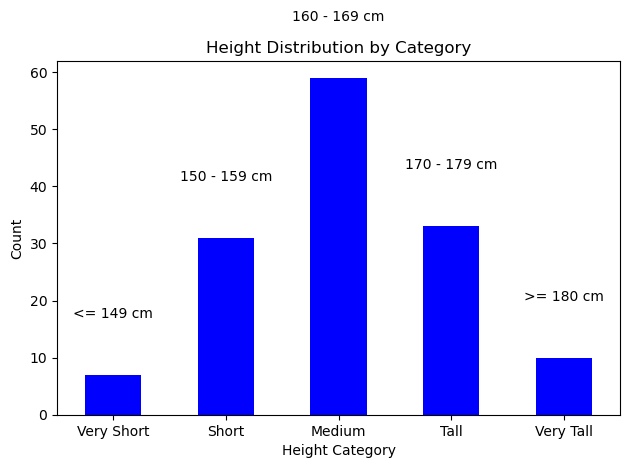

In [10]:
# Specify the order of categories for plotting
category_order = ["Very Short", "Short", "Medium", "Tall", "Very Tall"]

height_category_counts.loc[category_order].plot(kind='bar', color='blue')
plt.title("Height Distribution by Category")
plt.xlabel("Height Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
# Add height limits annotations to the plot
height_limits = {
    "Very Short": "<= 149 cm",
    "Short": "150 - 159 cm",
    "Medium": "160 - 169 cm",
    "Tall": "170 - 179 cm",
    "Very Tall": ">= 180 cm"
}

for idx, category in enumerate(category_order):
    plt.text(idx, height_category_counts[category] + 10, height_limits[category], ha='center')

average_height= data['Height'].mean()
print(f"Average height is: {average_height:.2f} cm")
plt.tight_layout()
plt.show()
print("\n")

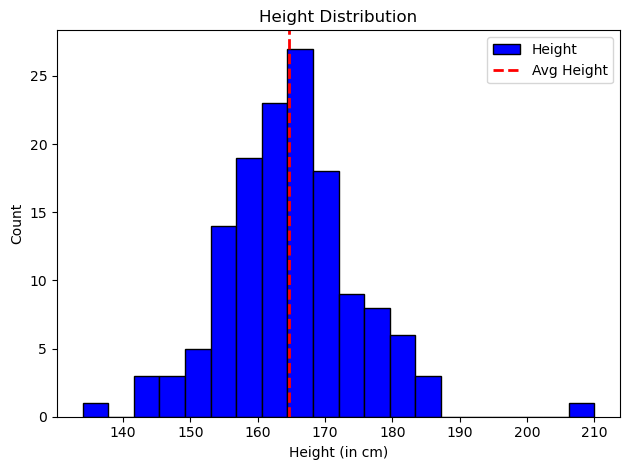

In [11]:
# Plot height distribution
data['Height'].plot(kind='hist', bins=20, color='blue', edgecolor='black')
plt.axvline(average_height, color='red', linestyle='dashed', linewidth=2, label='Avg Height')
plt.title("Height Distribution")
plt.xlabel("Height (in cm)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()
print("\n")

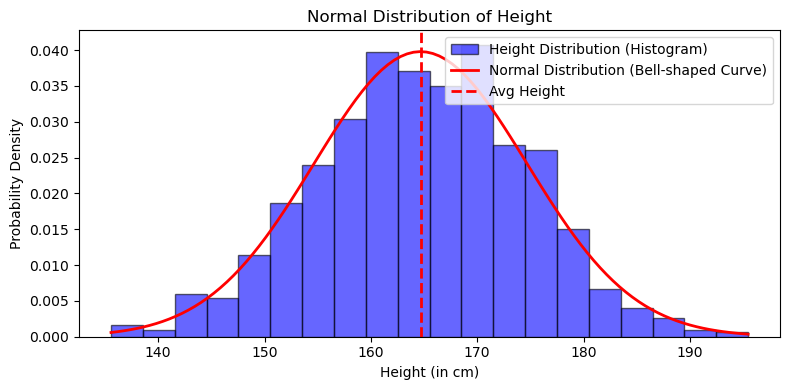

In [12]:
from scipy.stats import norm
# Create a normal distribution of height data for demonstration
mean_height = data['Height'].mean()
std_deviation = data['Height'].std()
height_distribution = np.random.normal(mean_height, std_deviation, 1000)
# Plot the normal distribution of height (bell-shaped curve)
plt.figure(figsize=(8, 4))
plt.hist(height_distribution, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label='Height Distribution (Histogram)')

# Create x values for the PDF plot
x_values = np.linspace(min(height_distribution), max(height_distribution), 100)
# Calculate the PDF values using the normal distribution parameters
pdf_values = norm.pdf(x_values, mean_height, std_deviation)
plt.plot(x_values, pdf_values, 'r-', linewidth=2, label='Normal Distribution (Bell-shaped Curve)')

plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label='Avg Height')
plt.title("Normal Distribution of Height")
plt.xlabel("Height (in cm)")
plt.ylabel("Probability Density")
plt.legend()
plt.tight_layout()
plt.show()

Gender Distribution:
Male      73
Female    67
Name: Gender, dtype: int64


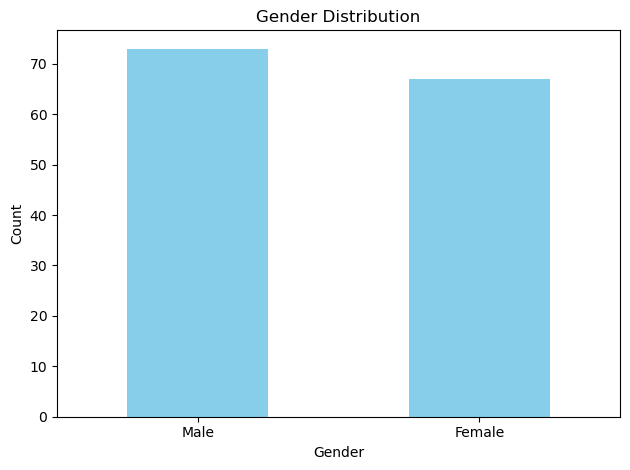

In [13]:
# Plot gender distribution
gender_counts = data['Gender'].value_counts()
print("Gender Distribution:")
print(gender_counts)
gender_counts.plot(kind='bar', color='skyblue')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

Blood Group Distribution:
O+     48
B+     44
A+     35
AB+    10
O -     1
AB-     1
B-      1
Name: Blood Group, dtype: int64


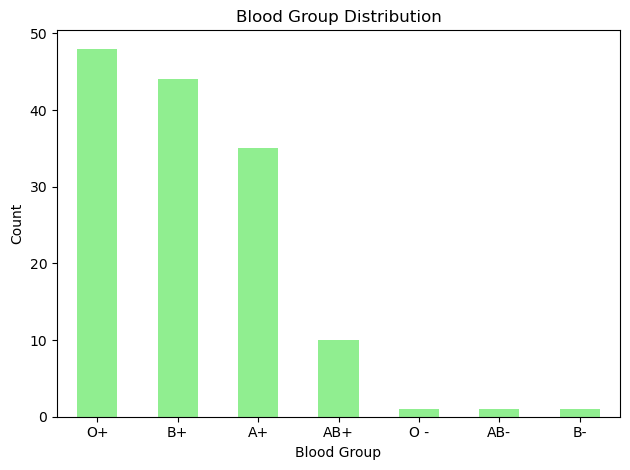

In [14]:
# Plot blood group distribution
blood_group_counts = data['Blood Group'].value_counts()
print("Blood Group Distribution:")
print(blood_group_counts)
blood_group_counts.plot(kind='bar', color='lightgreen')
plt.title("Blood Group Distribution")
plt.xlabel("Blood Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

Most Common Allergies:
None              92
Dust Allergy      38
Cold Air          11
Heat allergy      10
Smoke Allergy      9
Animal Allergy     5
Pollen Allergy     2
Mold Allergy       1
dtype: int64


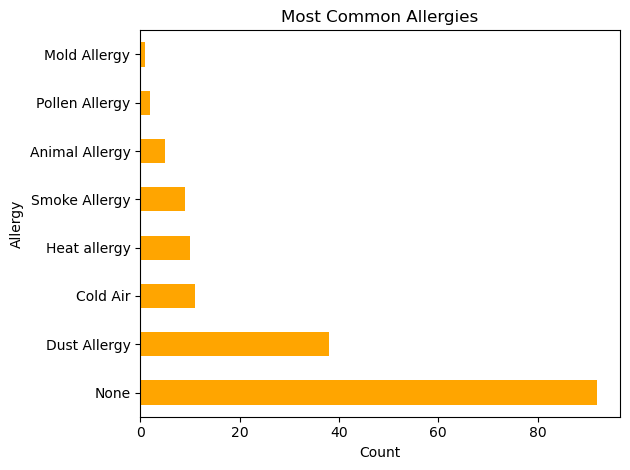

In [15]:
# Most common allergies
allergies = data['Allergy You Have'].str.split(', ', expand=True).stack().value_counts()
print("Most Common Allergies:")
print(allergies)
allergies[:10].plot(kind='barh', color='orange')
plt.title("Most Common Allergies")
plt.xlabel("Count")
plt.ylabel("Allergy")
plt.tight_layout()
plt.show()
print("\n")

Average Age: 25.05




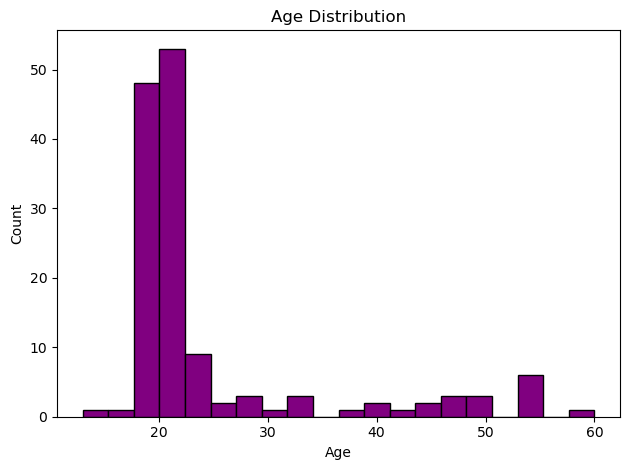

In [16]:
# Average age of participants
average_age = data['Age'].mean()
print(f"Average Age: {average_age:.2f}")
print("\n")

# Plot age distribution
data['Age'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("\n")

Common Symptoms or Health Issues:
Cold /Cough                                     33
None                                            26
Headache                                        25
Back ache                                       21
rash / skin problem                             17
Fever                                           16
Digestion problems                              12
allergy                                          9
Stomach ache                                     7
Joint pain                                       6
Abdominal pain                                   4
Sore throat                                      3
                                                 2
No                                               2
Conjunctivitis                                   2
No problem                                       1
Vertigo,balance disorders                        1
Sleep deprivation                                1
Don't have any health issues mentioned above    

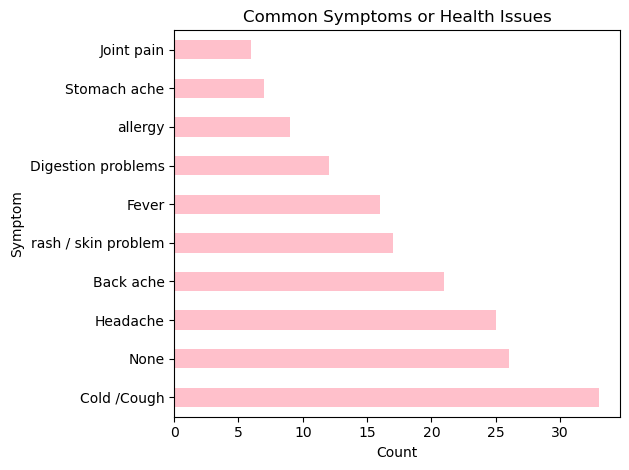

In [17]:
# Common symptoms or health issues
symptoms = data['What are the current symptoms or health issues you are facing'].str.split(', ', expand=True).stack().value_counts()
print("Common Symptoms or Health Issues:")
print(symptoms)
symptoms[:10].plot(kind='barh', color='pink')
plt.title("Common Symptoms or Health Issues")
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()
print("\n")

# Model Building

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/soumi/Downloads/med_data.csv")
df

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for thyroid,Medication you take for pcod,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing
0,26/08/2023 10:39:07,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,Male,O+,Normal,"Pollen Allergy, Dust Allergy, Animal Allergy, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem"
1,26/08/2023 10:55:45,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,Male,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough
2,26/08/2023 10:57:58,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,Female,B+,Normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,Aldry lotion,Paracetamol and citrisin,Abdominal pain
3,26/08/2023 10:58:17,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,Female,B+,Normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache
4,26/08/2023 10:58:34,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,Male,O+,Normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30/08/2023 23:38:14,NaN,Hemanta Sinha Roy,165,53,65.0,Male,A+,High,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache
136,31/08/2023 09:36:05,NaN,Tamanna Ajmi,157,18,59.0,Female,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem"
137,02/09/2023 17:38:14,NaN,ARNAB HAZRA,157,40,64.0,Male,A+,Normal,"Dust Allergy, None",...,Yes,No,No,No,No,No,No,Yes,No,Fever
138,06/09/2023 14:37:45,NaN,Ps,155,22,63.0,Male,O+,Normal,"Dust Allergy, Smoke Allergy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy"


In [22]:
#Preprocess data
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Medical Health History'] = LabelEncoder().fit_transform(df['Medical Health History'])
df['Allergy You Have'] = LabelEncoder().fit_transform(df['Allergy You Have'])
df

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for thyroid,Medication you take for pcod,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing
0,26/08/2023 10:39:07,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,1,O+,Normal,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem"
1,26/08/2023 10:55:45,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,1,A+,Normal,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough
2,26/08/2023 10:57:58,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,0,B+,Normal,13,...,NaN,NaN,NaN,NaN,NaN,NaN,None,Aldry lotion,Paracetamol and citrisin,Abdominal pain
3,26/08/2023 10:58:17,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,0,B+,Normal,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache
4,26/08/2023 10:58:34,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,1,O+,Normal,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30/08/2023 23:38:14,NaN,Hemanta Sinha Roy,165,53,65.0,1,A+,High,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache
136,31/08/2023 09:36:05,NaN,Tamanna Ajmi,157,18,59.0,0,A+,Normal,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem"
137,02/09/2023 17:38:14,NaN,ARNAB HAZRA,157,40,64.0,1,A+,Normal,7,...,Yes,No,No,No,No,No,No,Yes,No,Fever
138,06/09/2023 14:37:45,NaN,Ps,155,22,63.0,1,O+,Normal,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy"


In [23]:
from io import StringIO

# Select only the 'Medication you take...' columns
medication_columns = df.iloc[:, 12:-1]

# Combine the values from each row and store in a new column
df['All Medications'] = medication_columns.apply(lambda row: ', '.join(row.dropna()), axis=1)

# Display the updated DataFrame
df.head()

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for pcod,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,All Medications
0,26/08/2023 10:39:07,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,1,O+,Normal,15,...,NaN,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem","Asthalin, Pan D, Montair LC, Paracetamol"
1,26/08/2023 10:55:45,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,1,A+,Normal,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,
2,26/08/2023 10:57:58,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,0,B+,Normal,13,...,NaN,NaN,NaN,NaN,NaN,None,Aldry lotion,Paracetamol and citrisin,Abdominal pain,"None, Aldry lotion, Paracetamol and citrisin"
3,26/08/2023 10:58:17,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,0,B+,Normal,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,"None, None, None"
4,26/08/2023 10:58:34,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,1,O+,Normal,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,


In [24]:
# Select only the 'Name' column and the 'Medication you take...' columns
medication_columns = df.iloc[:, 2:-1]

# Create a list of conditions and corresponding medications
conditions_and_meds = []
for index, row in medication_columns.iterrows():
    for condition, medication in row.items():
        if condition.startswith('Medication you take') and medication:
            conditions_and_meds.append([condition.replace('Medication you take for ', ''), medication])

# Create a new DataFrame for conditions and medications
conditions_df = pd.DataFrame(conditions_and_meds, columns=['Condition', 'Medication'])

conditions_df

,Condition,Medication
0,diabetes,NaN
1,high pressure,NaN
2,heart disease,NaN
3,asthma,Asthalin
4,gastric,Pan D
...,...,...
1815,arthritis,NaN
1816,back pain,NaN
1817,anxiety,NaN
1818,allergies,NaN


In [25]:
# Drop rows with missing values in the 'Medication' column
conditions_df = conditions_df.dropna(subset=['Medication'])
conditions_df = conditions_df[conditions_df['Medication'].astype(str).str.isalpha()]
conditions_df

,Condition,Medication
3,asthma,Asthalin
12,cold/ cough/ fever,Paracetamol
36,anxiety,None
39,diabetes,None
40,high pressure,None
...,...,...
1788,migraine,No
1789,arthritis,No
1790,back pain,No
1791,anxiety,No


In [26]:
# List of values to drop
values_to_drop = ["-","None", "Nil", "Nil ", "no ", "Nothing ", "No", "Yes", "Nothing", "Na", "Yes9", "Some time", "NIL", "None ", "Y","N", "no ", "No ", "Yes ", "Nothing ", "Na ", "Yes9 ", "Some time ", "NIL "]

# Drop rows with specified values in the 'Medication' column
conditions_df = conditions_df[~conditions_df['Medication'].isin(values_to_drop)]

conditions_df

,Condition,Medication
3,asthma,Asthalin
12,cold/ cough/ fever,Paracetamol
315,asthma,Inhaler
322,anxiety,Antidepressants
323,allergies,Inhaler
324,cold/ cough/ fever,Paracetamol
389,cold/ cough/ fever,MontairFX
511,gastric,Gerocile
525,thyroid,no
753,cold/ cough/ fever,Paracetamale


In [27]:
# Save the conditions and medications DataFrame as a CSV file
conditions_df.to_csv('C:/Users/soumi/Downloads/conditions_and_medications.csv', index=False)

print("CSV file saved successfully.")
conditions_df

CSV file saved successfully.


,Condition,Medication
3,asthma,Asthalin
12,cold/ cough/ fever,Paracetamol
315,asthma,Inhaler
322,anxiety,Antidepressants
323,allergies,Inhaler
324,cold/ cough/ fever,Paracetamol
389,cold/ cough/ fever,MontairFX
511,gastric,Gerocile
525,thyroid,no
753,cold/ cough/ fever,Paracetamale


# Model

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the preprocessed dataset (conditions_df)
conditions_df = pd.read_csv('C:/Users/soumi/Downloads/conditions_and_medications.csv')

# Create a dictionary to map conditions to labels
condition_to_label = {condition: label for label, condition in enumerate(conditions_df['Condition'])}

# Add a new column with encoded conditions in the dataset
conditions_df['Condition_Label'] = conditions_df['Condition'].map(condition_to_label)

# Create and train a Decision Tree Classifier
model = DecisionTreeClassifier()
X_train = conditions_df[['Condition_Label']]
y_train = conditions_df['Medication']
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate and print the accuracy on the training data
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on Training Data: {accuracy*100}%")

Accuracy on Training Data: 47.82608695652174%


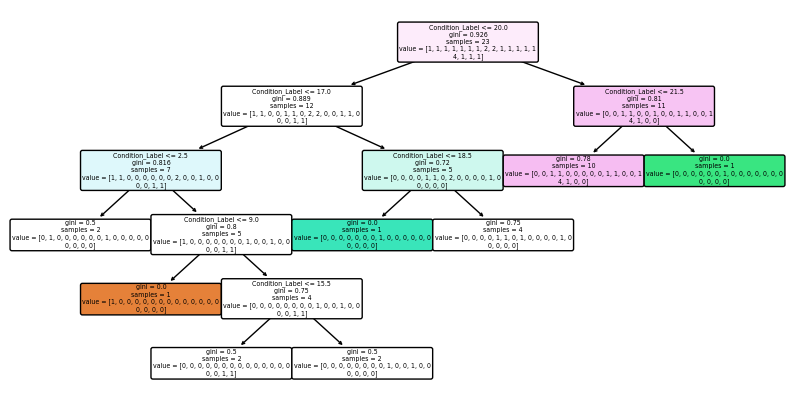

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True, feature_names=['Condition_Label'], rounded=True)
plt.show()

In [35]:
# List of available conditions
available_conditions = conditions_df['Condition'].unique()

# Get symptoms input from the user
entered_symptoms = []
print("Available conditions to choose from:")
for idx, condition in enumerate(available_conditions):
    print(f"{idx + 1}. {condition}")
while True:
    choice = input("Enter a number corresponding to a symptom (or 'done' to finish): ")
    if choice.lower() == 'done':
        break
    try:
        index = int(choice) - 1
        if 0 <= index < len(available_conditions):
            entered_symptoms.append(available_conditions[index])
        else:
            print("Invalid choice. Please enter a valid number.")
    except ValueError:
        print("Invalid input. Please enter a number or 'done'.")

# Encode entered symptoms using the condition-to-label mapping
entered_symptoms_encoded = [condition_to_label[symptom] for symptom in entered_symptoms]

# Predict medications for the entered symptoms
predicted_medications = model.predict(pd.DataFrame(entered_symptoms_encoded, columns=['Condition_Label']))

# Print the predicted medications
print("Predicted Medications:")
for symptom, medication in zip(entered_symptoms, predicted_medications):
    print(f"For symptom '{symptom}', predicted medication: {medication}")

Available conditions to choose from:
1. asthma
2. cold/ cough/ fever
3. anxiety
4. allergies
5. gastric
6. thyroid
7. high pressure
8. diabetes
Enter a number corresponding to a symptom (or 'done' to finish): 3
Enter a number corresponding to a symptom (or 'done' to finish): done
Predicted Medications:
For symptom 'anxiety', predicted medication: Antidepressants


In [36]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Medication Predictor"),
    html.Label("Select Symptoms:"),
    dcc.Dropdown(
        id='symptoms-dropdown',
        options=[{'label': condition, 'value': condition} for condition in available_conditions],
        multi=True
    ),
    html.Div(id='output-container')
])

# Define callback to update output based on selected symptoms
@app.callback(
    Output('output-container', 'children'),
    Input('symptoms-dropdown', 'value')
)
def update_output(selected_symptoms):
    if selected_symptoms:
        # Encode selected symptoms using the condition-to-label mapping
        selected_symptoms_encoded = [condition_to_label[symptom] for symptom in selected_symptoms]

        # Predict medications for the selected symptoms
        predicted_medications = model.predict(pd.DataFrame(selected_symptoms_encoded, columns=['Condition_Label']))

        # Create a list of predicted medications
        medications_list = []
        for symptom, medication in zip(selected_symptoms, predicted_medications):
            medications_list.append(f"For symptom '{symptom}', predicted medication: {medication}")

        return html.Div([html.P(medication) for medication in medications_list])
    else:
        return ""

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\soumi\AppData\Local\Temp\ipykernel_13452\3481337007.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\soumi\AppData\Local\Temp\ipykernel_13452\3481337007.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
